In [14]:
import subprocess
from pathlib import Path


def clear_folder(folder_path):
    for item in folder_path.iterdir():
        if item.is_file():
            item.unlink()


video_path = Path("./data/video-src/1.mp4")
output_folder = Path("./data/video-sq/")

# Очистка папки перед каждым запуском
clear_folder(output_folder)

if not output_folder.exists():
    output_folder.mkdir(parents=True, exist_ok=True)

In [15]:
fps = 5
scale = 512
# Добавление фильтра масштабирования для установки ширины 512 пикселей и сохранение пропорций
command = f'ffmpeg -i "{video_path.as_posix()}" -vf "fps={fps},scale={scale}:-1" "{(output_folder / "frame%04d.png").as_posix()}"'

try:
    result = subprocess.run(command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
except subprocess.CalledProcessError as e:
    print(f"Error: {e.returncode}")
    print("FFmpeg output:")
    print(e.stderr.decode())

# Сбор в сетку

In [23]:
from pathlib import Path
from PIL import Image
import math


def create_grid(input_folder, output_image_path, step):
    image_paths = sorted([p for p in input_folder.glob("*.png")])
    selected_image_paths = image_paths[::step]
    images = [Image.open(p) for p in selected_image_paths]
    width, height = images[0].size
    grid_size = int(math.ceil(math.sqrt(len(images))))
    grid_width = grid_size * width
    grid_height = grid_size * height
    grid_image = Image.new("RGB", (grid_width, grid_height))

    for i, image in enumerate(images):
        x = (i % grid_size) * width
        y = (i // grid_size) * height
        grid_image.paste(image, (x, y))

    grid_image.save(output_image_path)

    num_rows = grid_size
    num_columns = grid_size

    return grid_image, num_rows, num_columns


def extract_images(grid_image_path, output_folder, num_rows, num_columns):
    grid_image = Image.open(grid_image_path)
    grid_width, grid_height = grid_image.size
    img_width = grid_width // num_columns
    img_height = grid_height // num_rows

    output_folder.mkdir(parents=True, exist_ok=True)

    for i in range(num_rows * num_columns):
        x = (i % num_columns) * img_width
        y = (i // num_columns) * img_height
        cropped_image = grid_image.crop((x, y, x + img_width, y + img_height))
        cropped_image.save(output_folder / f"extracted_image_{i:04d}.png")


input_folder = Path("./data/video-sq/")
output_image_path = "./data/video-grid/image_grid.png"

step = 3  # Задайте шаг выбора изображений

grid_image, num_rows, num_columns = create_grid(input_folder, output_image_path, step)

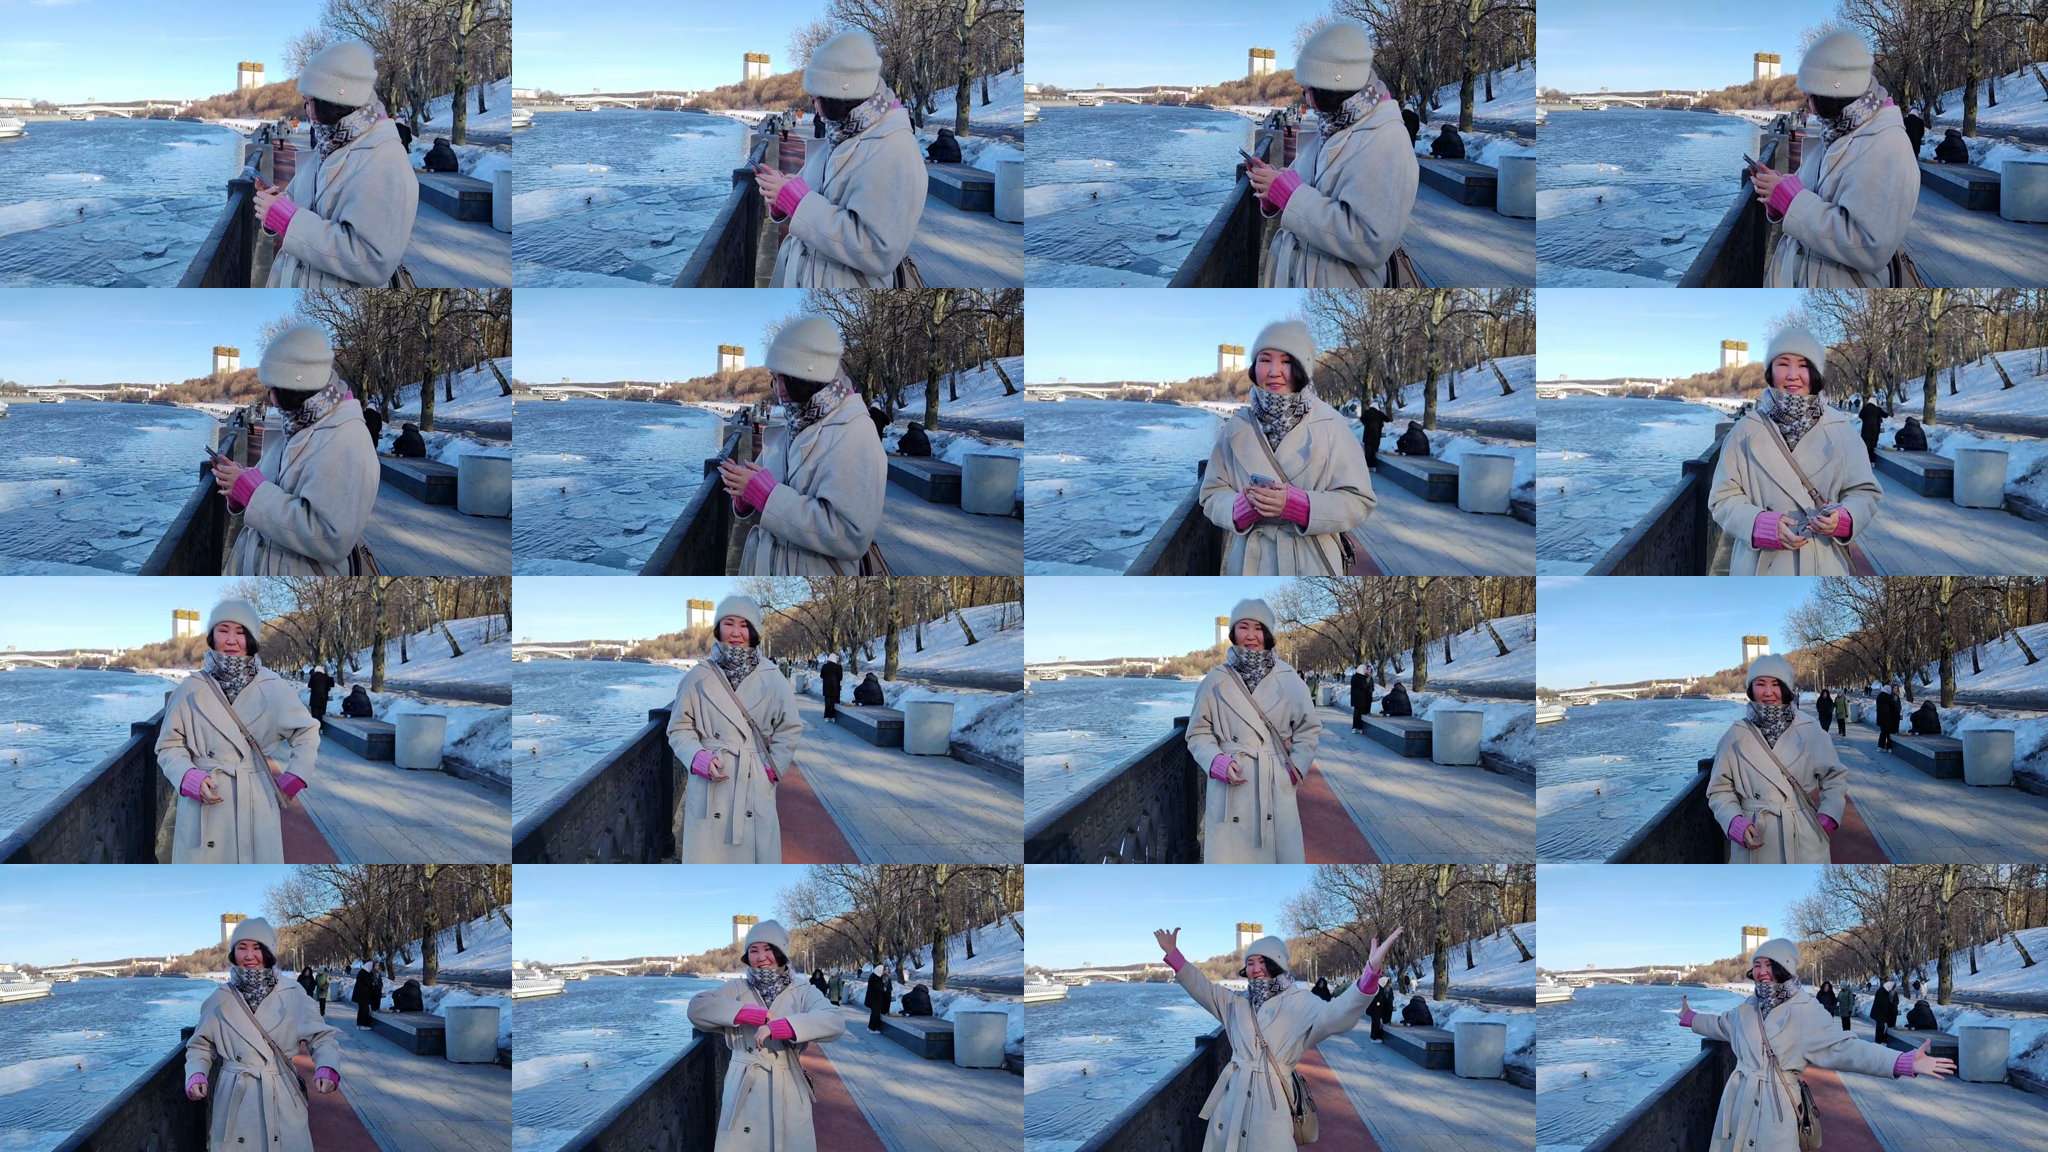

In [22]:
grid_image

In [24]:
grid_image_path = output_image_path
output_folder = Path("./data/video-keyframes/")
extract_images(grid_image_path, output_folder, num_rows, num_columns)
